# 3D Visualizations for Toy Data

This notebook is for developing some fancy 3D visualizations of the toy data.

In [441]:
# System imports
from __future__ import print_function

# External imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Local imports
from toydata import (sample_track_params, gen_straight_tracks,
                     generate_data, track_hit_coords)

# Magic
%matplotlib notebook

Let's start with some 3D visualizations of a single track in my toy data

In [442]:
# Detector configuration
num_det_layers = 10
det_layer_size = 32
det_shape = (num_det_layers, det_layer_size, det_layer_size)

In [443]:
# Generate coordinates for a single track event
event, params = gen_straight_tracks(1, num_det_layers, det_layer_size)
event, params = event[0], params[0]
# Get the hit coordinates for this track
layer_idx = np.arange(num_det_layers)
x, y = track_hit_coords(params, layer_idx, as_type=np.float32)
xhits, yhits = x.astype(np.int), y.astype(np.int)

In [444]:
print(layer_idx)
print(xhits)
print(yhits)

[0 1 2 3 4 5 6 7 8 9]
[19 19 19 19 19 19 18 18 18 18]
[2 2 3 3 3 4 4 4 4 5]


<IPython.core.display.Javascript object>


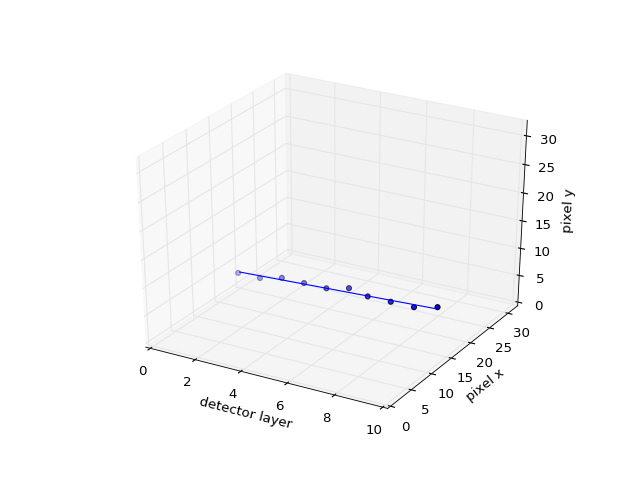

In [445]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(layer_idx, xhits+0.5, yhits+0.5)
ax.plot(layer_idx, x, y)
ax.set_xlim(0, num_det_layers)
ax.set_ylim(0, det_layer_size)
ax.set_zlim(0, det_layer_size)
ax.set_xlabel('detector layer')
ax.set_ylabel('pixel x')
ax.set_zlabel('pixel y')

In [449]:
# Now let's generate an event with multiple tracks
data = generate_data((1,)+det_shape, noise_prob=0, avg_bkg_tracks=3, verbose=False)
event, sig_track, sig_param = data[0][0], data[1][0], data[2][0]

In [450]:
# Get the hit coordinates for the signal track
x, y = track_hit_coords(sig_param, layer_idx, as_type=np.float32)
xhits, yhits = x.astype(np.int), y.astype(np.int)

<IPython.core.display.Javascript object>


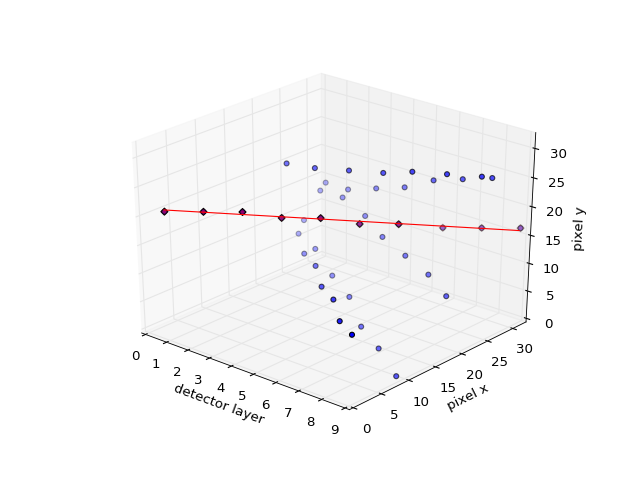

In [451]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
evhits = np.nonzero(event)
ax2.scatter(evhits[0], evhits[1]+0.5, evhits[2]+0.5)
ax2.scatter(layer_idx, xhits+0.5, yhits+0.5, c='r', marker='D')
ax2.plot(layer_idx, x, y, 'r')
ax2.set_xlim(0, num_det_layers-1)
ax2.set_ylim(0, det_layer_size)
ax2.set_zlim(0, det_layer_size)
ax2.set_xlabel('detector layer')
ax2.set_ylabel('pixel x')
ax2.set_zlabel('pixel y')

<IPython.core.display.Javascript object>


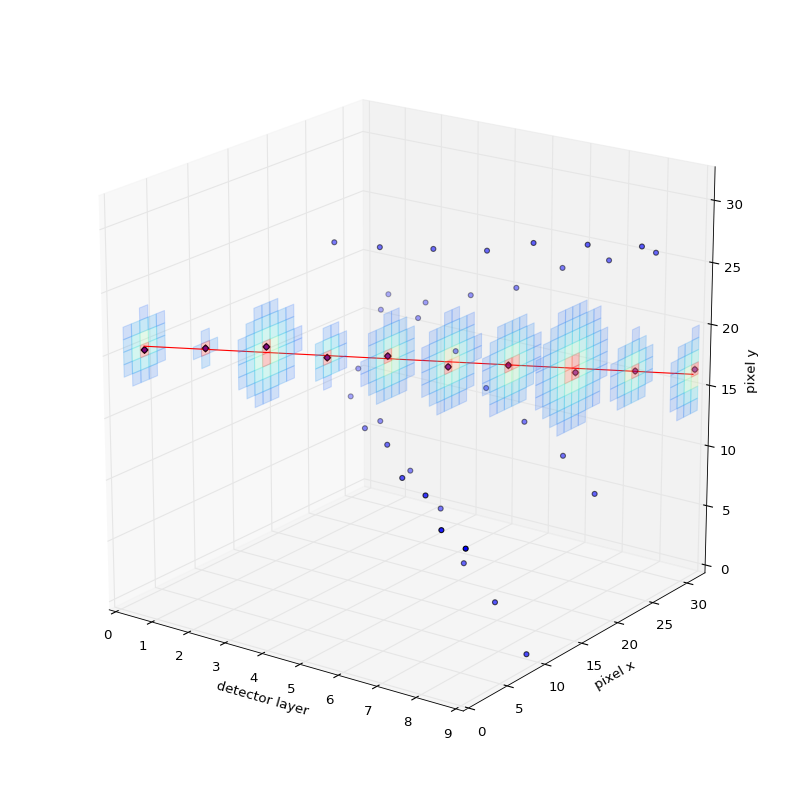

In [462]:
fig3 = plt.figure(figsize=(10,10))#figsize=(12,5))
ax3 = fig3.add_subplot(111, projection='3d')

cmap = cm.rainbow
pgrid = np.arange(0, det_layer_size+1)
xgrid, ygrid = np.meshgrid(pgrid, pgrid)
for i in range(num_det_layers):
    distance = np.sqrt((xgrid + 0.5 - x[i])**2 + (ygrid + 0.5 - y[i])**2)
    pred = 1. / (distance + 0.1)
    pred = pred / pred.max()
    colors = cmap(pred)
    colors[:,:,3] = 0.2
    colors[pred < 0.15,:] = 0.
    ax3.plot_surface(i, xgrid, ygrid,
                     rstride=1, cstride=1,
                     facecolors=colors,
                     shade=False)

evhits = np.nonzero(event)
ax3.scatter(evhits[0], evhits[1]+0.5, evhits[2]+0.5)
ax3.scatter(layer_idx, xhits+0.5, yhits+0.5, c='r', marker='D')
ax3.plot(layer_idx, x, y, 'r')

ax3.set_xlim(0, num_det_layers-1)
ax3.set_ylim(0, det_layer_size)
ax3.set_zlim(0, det_layer_size)
ax3.set_xlabel('detector layer')
ax3.set_ylabel('pixel x')
ax3.set_zlabel('pixel y')
ax3.view_init()#azim=280)
plt.tight_layout()

This is beautiful. I think I'm done here.